In [10]:
# Setup Imports
import numpy as np
import matplotlib.pyplot as plt

# Loading Results from OL2.py Application outputs
results = [{
        "title":"Cifar10",
        "relu": np.loadtxt("cifar10-resnet-relu.txt"),
        "gelu": np.loadtxt("cifar10-resnet-gelu.txt"),
        "gelu-from-scratch": np.loadtxt("cifar10-resnet-gelu-from-scratch.txt"),
    },{
        "title":"Cifar100",
        "relu": np.loadtxt("cifar100-resnet-relu.txt"),
        "gelu": np.loadtxt("cifar100-resnet-gelu.txt"),
        "gelu-from-scratch": np.loadtxt("cifar100-resnet-gelu-from-scratch.txt"),
    }]


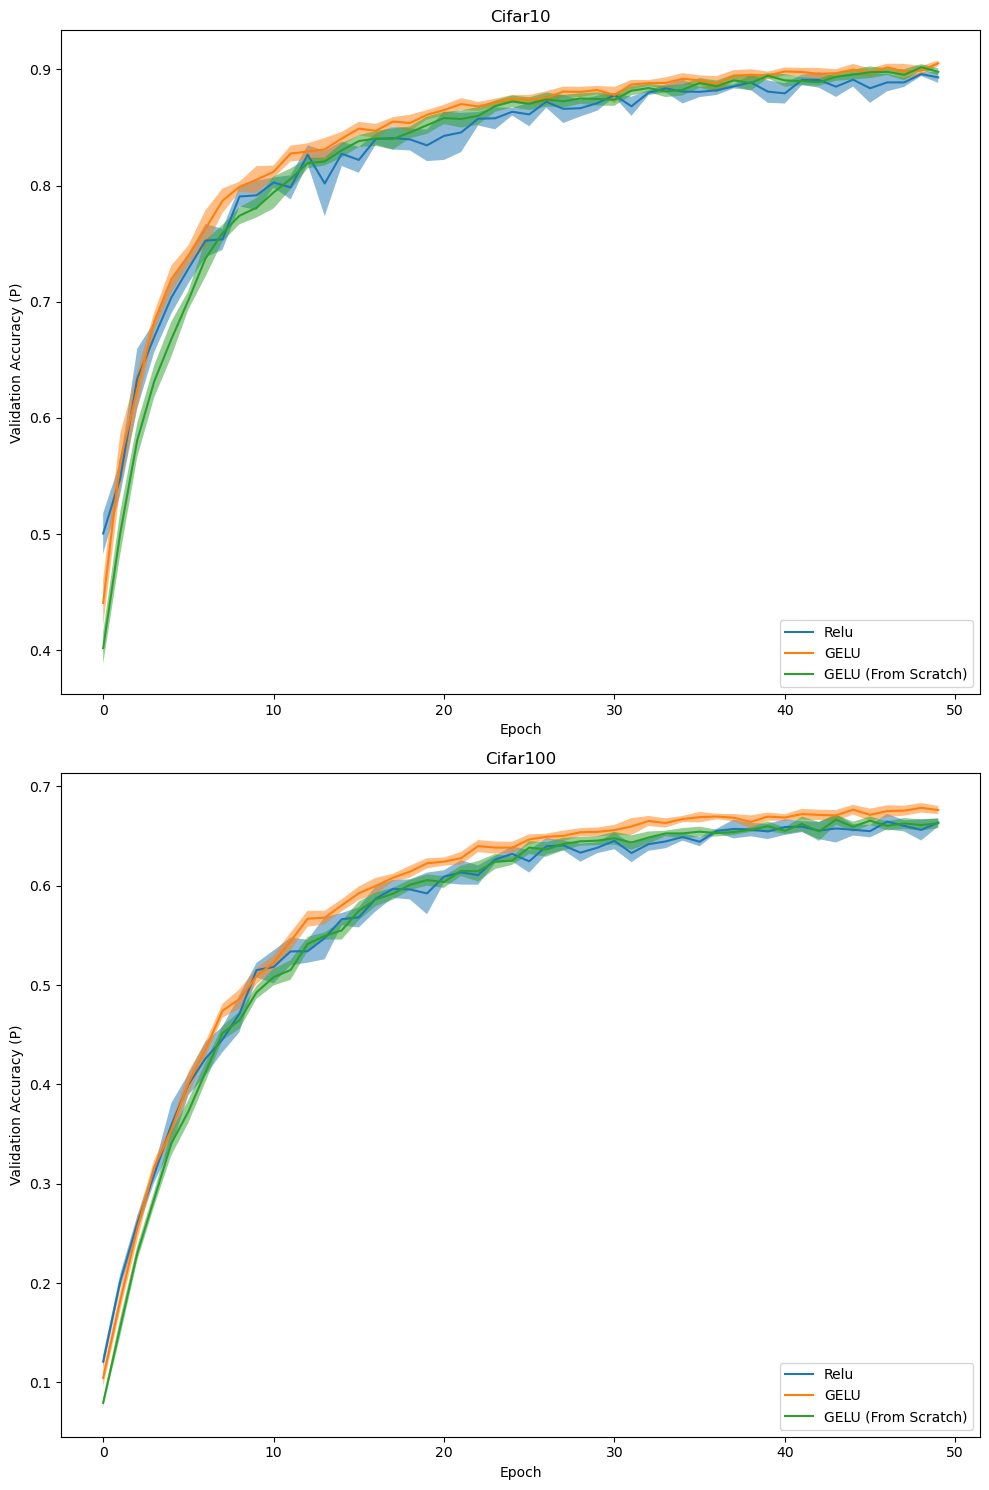

In [13]:
# Create a 2x2 grid for the Plots (subplots)
fig, axes = plt.subplots(2, 1, figsize=(10, 15))

# Default Values for all Plots
for i, axis in enumerate(axes.ravel()):

    # Setup Data Layers for Plots
    axis.set_title(results[i]["title"])

    # Setup Relu
    data = results[i]["relu"]
    axis.plot(np.arange(0, data.shape[1]), np.mean(data, 0),label='Relu')
    axis.fill_between(np.arange(0, data.shape[1]), np.mean(data, 0)-(1.96*np.std(data, 0)/np.sqrt(data.shape[0])), np.mean(data, 0)+(1.96*np.std(data, 0)/np.sqrt(data.shape[0])), alpha=0.5)

    # Setup GELU
    data = results[i]["gelu"]
    axis.plot(np.arange(0, data.shape[1]), np.mean(data, 0),label='GELU')
    axis.fill_between(np.arange(0, data.shape[1]), np.mean(data, 0)-(1.96*np.std(data, 0)/np.sqrt(data.shape[0])), np.mean(data, 0)+(1.96*np.std(data, 0)/np.sqrt(data.shape[0])), alpha=0.5)

     # Setup GELU - From Scratch
    data = results[i]["gelu-from-scratch"]
    axis.plot(np.arange(0, data.shape[1]), np.mean(data, 0),label='GELU (From Scratch)')
    axis.fill_between(np.arange(0, data.shape[1]), np.mean(data, 0)-(1.96*np.std(data, 0)/np.sqrt(data.shape[0])), np.mean(data, 0)+(1.96*np.std(data, 0)/np.sqrt(data.shape[0])), alpha=0.5)
    
    # General Setting and UI configs that are the same on each Plot
    axis.set_ylabel('Validation Accuracy (P)')
    axis.set_xlabel('Epoch')
    axis.legend(loc='lower right') 

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

# Ansers to OL3 Questions:

## Answer 1
The **GELU** performed slighly better than the ReLU on both the Cifar10 and Cifar100. This is both the case from the "From Scratch" and also the "activation fucntoion "subsitution" implementations. It is interesting that it seems the "From Scratch" performed slightly less well than the Resnet "substiotions" method.

## Answer 2
There seems to be a smoothness to GELU, which in turn would indicate that the learing rate would be smoother and hence converge faster. I'm guessing this also by this -> my thoughts would then help the gradient, which in turn is better for backwards propogation.

In asking ChatGPT... it also stated that GEU would be smoother due to the the fact that "Gausian Error Linear Unit" has less abrupt transition values around the "0". In addition, GELU is fully differentiable everywhere, which can be beneficial in many optimization scenarios.

## Answer 3
Althought I feel that the learning and convergence of the GELU is really good, I could try and use other otimizers for this expereiment. As an examample I could use the **RMSProp** which adjusts the learning rate on the parameters. This might allows me to adjust teh learning rates differently than on the **ADAM** optimizer I used.

## Answer 4
I'm thinking if I change to the **RMSProp** I might getter faster convergence and might not need as many epochs to achieve the **85-90%** accuracy on the Cifar10 and the **60-65%** accuracy on the Cifar100.

## Answer 5
I would run my models with **RMSProp** wiht the current learning rate of `lr=0.001` and `weight_decay=1e-4` on **RMSProp** and graph it on the same polts as above. I would then also modify the learning rate **up** by `0.001` to `lr=0.002` and re-run the expereiment and graph it onto the plots to see how the convergence reacts to the new learning rate.

## Answer 6
I am still not quite clear on the following below:
```
# Linear projection - learned upsampling
self.projection = torch.nn.ConvTranspose2d(3,3,
                                           (4,4), # 8x
                                           (4,4)) # 8+
```
and why this works or is used on this lab expereiment.

## Answer 7
I think as a whole the **Bottleneck** are the area that might be useful to take more time in.


# The following are Important Citations

```
#
# *****************************************
# ********** Citation References **********
# *****************************************
#
# It should be noted that code for the following 
# functions and classes was heaviliy adapted from the 
# following sources:
#
# -> https://pytorch.org/vision/main/_modules/torchvision/models/resnet.html#resnet50
#    Detailes on how to creare the underlying calls to Resnet
#
# -> https://github.com/pytorch/vision/blob/main/torchvision/models/resnet.py
#    This is the source code for Resnet that is implmented in PyTorch. I 
#    used this for a large part of the below code. Heavy adapatons have taking place
#    to make my classes and functions a bit more readable for my educational
#    pruposes!

# Code Functions & Classes
# These were adabped fromt the before mentioned source a from above.
# -> def conv3x3()
# -> def conv1x1()
# -> class Bottleneck()
# -> class ResNetGelu()

```